In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
from numpy import linalg as LA

# 問1

In [218]:
def f1(vec_x):
    x, y = vec_x[0], vec_x[1]
    return x**2 + y**2 + math.exp(- x**2 - y**2)

def nabla_f1(vec_x):
    x, y = vec_x[0], vec_x[1]
    res_x = 2 * x * (1 - math.exp(- x**2 - y**2))
    res_y = 2 * y * (1 - math.exp(- x**2 - y**2))
    return np.array([res_x, res_y])

In [216]:
def f2(vec_x):
    x, y = vec_x[0], vec_x[1]
    return 2 * x**2 - 1.05 * x**4 + x**6 / 6 + x*y + y**2 

def nabla_f2(vec_x):
    x, y = vec_x[0], vec_x[1]
    res_x = 4 * x - 4.2 * x**3 + x **5 + y
    res_y = x + 2 * y
    return np.array([res_x, res_y])


## 関数の観察

In [227]:
def plot3D(f, x_min=-5, x_max=5, x_num=101, y_min=-5, y_max=5, y_num=101):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    x = np.linspace(x_min, x_max, x_num)
    y = np.linspace(y_min, y_max, y_num)

    X, Y = np.meshgrid(x, y)
    z = np.array([[f([x_e, y_e]) for x_e in x] for y_e in y])

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.plot_surface(X,Y,z, cmap='terrain')
    
    plt.show()

### (i) f1のグラフ

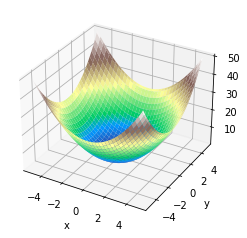

In [228]:
plot3D(f1)

停留点は(0,0)と予想される.

### (ii) f2のグラフ

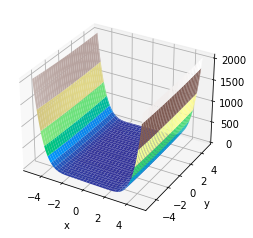

In [229]:
plot3D(f2)

#### x=0付近を拡大

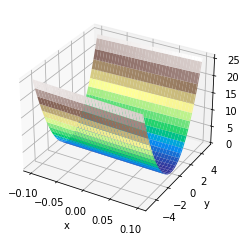

In [230]:
plot3D(f2, x_min=-0.1, x_max=0.1)

上のグラフと合わせて, 停留点は(0,0)と予想される.

## バックトラッキング法を用いた最急降下法

In [168]:
def BackTracking(f, nabla_f, x_in, eps=0.000001, c_1=0.8, alpha_0=10, rho=0.8, max_times=10000):
    log_df = pd.DataFrame(columns=['x_k', 'd_k', 'output', 'alpha'])

    tmp_x = x_in
    tmp_alpha = alpha_0

    def armijo_condition(x, d, alpha):
        return f(x + alpha * d) <= f(x) + c_1 * alpha * np.dot(nabla_f(x), d)

    while len(log_df) < max_times : # 最大でmax_times回繰り返す
        tmp_nabla = nabla_f(tmp_x)
        if LA.norm(tmp_nabla) < eps : break # |nabla_f(x)| < epsになったら打ち切り
        d = - tmp_nabla      # 降下方向
        while not armijo_condition(tmp_x, d, tmp_alpha):
            tmp_alpha *= rho
        log_df = log_df.append({'x_k':tmp_x, 'd_k':d, 'output':f(tmp_x), 'alpha':tmp_alpha}, ignore_index=True)
        tmp_x += tmp_alpha * d

    res_x = tmp_x
    return log_df, res_x

In [173]:
log_1_1, res_1_1 = BackTracking(f1, nabla_f1, [-1,-1])

In [174]:
log_1_1

,x_k,d_k,output,alpha
0,"[-1, -1]","[1.7293294335267746, 1.7293294335267746]",2.135335,0.115292
1,"[-0.010413871502404946, -0.010413871502404946]","[1.1569237272058395, 1.1569237272058395]",1.559475,0.115292
2,"[-0.010413871502404946, -0.010413871502404946]","[0.7866912072369789, 0.7866912072369789]",1.300899,0.115292
3,"[-0.010413871502404946, -0.010413871502404946]","[0.5599570669712278, 0.5599570669712278]",1.179173,0.115292
4,"[-0.010413871502404946, -0.010413871502404946]","[0.41777407211145834, 0.41777407211145834]",1.116248,0.115292
...,...,...,...,...
9995,"[-0.010413871502404946, -0.010413871502404946]","[4.520384642188565e-06, 4.520384642188565e-06]",1.000000,0.115292
9996,"[-0.010413871502404946, -0.010413871502404946]","[4.519706223511278e-06, 4.519706223511278e-06]",1.000000,0.115292
9997,"[-0.010413871502404946, -0.010413871502404946]","[4.51902797450909e-06, 4.51902797450909e-06]",1.000000,0.115292
9998,"[-0.010413871502404946, -0.010413871502404946]","[4.518349895124308e-06, 4.518349895124308e-06]",1.000000,0.115292


In [175]:
log_1_2, res_1_2 = BackTracking(f1, nabla_f1, [2,-1])

In [178]:
log_1_2

,x_k,d_k,output,alpha
0,"[2, -1]","[-3.973048212003658, 1.986524106001829]",5.006738,0.144115
1,"[0.013173390267142985, -0.0065866951335714925]","[-2.631248443220448, 1.315624221610224]",2.625244,0.144115
2,"[0.013173390267142985, -0.0065866951335714925]","[-1.5655597261681151, 0.7827798630840576]",1.626688,0.115292
3,"[0.013173390267142985, -0.0065866951335714925]","[-1.058333423929638, 0.529166711964819]",1.331348,0.115292
4,"[0.013173390267142985, -0.0065866951335714925]","[-0.7471590501632852, 0.3735795250816426]",1.194123,0.115292
...,...,...,...,...
9995,"[0.013173390267142985, -0.0065866951335714925]","[-5.718886421338538e-06, 2.859443210669269e-06]",1.000000,0.115292
9996,"[0.013173390267142985, -0.0065866951335714925]","[-5.718028031446712e-06, 2.859014015723356e-06]",1.000000,0.115292
9997,"[0.013173390267142985, -0.0065866951335714925]","[-5.717169856267394e-06, 2.858584928133697e-06]",1.000000,0.115292
9998,"[0.013173390267142985, -0.0065866951335714925]","[-5.716311895724657e-06, 2.8581559478623286e-06]",1.000000,0.115292


In [176]:
log_2_1, res_2_1 = BackTracking(f2, nabla_f2, [-1,-1])

In [179]:
log_2_1

,x_k,d_k,output,alpha
0,"[-1, -1]","[1.7999999999999998, 3.0]",3.116667e+00,0.225180
1,"[2.348329337370058e-07, -5.669384267935658e-07]","[1.8942708036579101, 1.2435961453255049]",8.815592e-01,0.144115
2,"[2.348329337370058e-07, -5.669384267935658e-07]","[1.2956066240491253, 0.6121607674417529]",2.637161e-01,0.092234
3,"[2.348329337370058e-07, -5.669384267935658e-07]","[0.8631389296355099, 0.3797384182819309]",1.058444e-01,0.092234
4,"[2.348329337370058e-07, -5.669384267935658e-07]","[0.5363402462008586, 0.230078529436701]",3.929013e-02,0.092234
...,...,...,...,...
65,"[2.348329337370058e-07, -5.669384267935658e-07]","[-6.937703402024468e-07, 1.6749595873688895e-06]",1.036333e-12,0.073787
66,"[2.348329337370058e-07, -5.669384267935658e-07]","[-6.125956809842375e-07, 1.4789703962794687e-06]",8.079987e-13,0.073787
67,"[2.348329337370058e-07, -5.669384267935658e-07]","[-5.409181025909366e-07, 1.3059144721284913e-06]",6.299729e-13,0.073787
68,"[2.348329337370058e-07, -5.669384267935658e-07]","[-4.776267379357143e-07, 1.1531082229457553e-06]",4.911714e-13,0.073787


In [239]:
log_2_2, res_2_2 = BackTracking(f2, nabla_f2, [2,-1])

In [240]:
log_2_2

,x_k,d_k,output,alpha
0,"[2, -1]","[-5.399999999999999, -0.0]",0.866667,0.012379
1,"[1.7475523966882514, -0.8737766942421151]","[-3.388273273829906, 0.06684876212141067]",0.575478,0.012379
2,"[1.7475523966882514, -0.8737766942421151]","[-2.349265560014744, 0.10713845843442149]",0.455639,0.012379
3,"[1.7475523966882514, -0.8737766942421151]","[-1.720988062165227, 0.1335683376821204]",0.396467,0.012379
4,"[1.7475523966882514, -0.8737766942421151]","[-1.3058050054758612, 0.15156614611103558]",0.364054,0.012379
...,...,...,...,...
520,"[1.7475523966882514, -0.8737766942421151]","[-1.0899923807983214e-07, 1.1173128899866214e-06]",0.298638,0.012379
521,"[1.7475523966882514, -0.8737766942421151]","[-1.0643218106842767e-07, 1.0909989081042681e-06]",0.298638,0.012379
522,"[1.7475523966882514, -0.8737766942421151]","[-1.0392558646987737e-07, 1.0653046500497254e-06]",0.298638,0.012379
523,"[1.7475523966882514, -0.8737766942421151]","[-1.0147802409488094e-07, 1.0402155208311115e-06]",0.298638,0.012379


## ニュートン法